In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
file_path = '../Data/finalised.csv'
data = pd.read_csv(file_path)

# Display 
data.head()

Date     RegionName   AreaCode  AveragePrice      Index   IndexSA  \
0  01/01/2013  East Midlands  E12000004   137536.5355  89.501836  89.73525   
1  01/02/2013  East Midlands  E12000004   137599.2999  89.542680  89.74266   
2  01/03/2013  East Midlands  E12000004   138561.8313  90.169047  90.19189   
3  01/04/2013  East Midlands  E12000004   139314.2861  90.658707  90.45051   
4  01/05/2013  East Midlands  E12000004   141012.3511  91.763722  90.93737   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...     NewPrice  \
0  -1.036673    0.856126     137895.2167       3447.0  ...  173897.6555   
1   0.045635    1.099802     137906.6118       3522.0  ...  175581.5732   
2   0.699518    1.121401     138596.9279       4585.0  ...  180069.6051   
3   0.543046    0.631746     138994.3555       4258.0  ...  179464.4630   
4   1.218874    1.997612     139742.5070       5780.0  ...  181727.5737   

    NewIndex  New1m%Change  New12m%Change  NewSalesVolume     OldPrice  \
0  86.715297     -3.977678       0.034394           217.0  134817.7424   
1  87.554994      0.968338       0.532139           307.0  134753.3618   
2  89.792983      2.556095       1.854837           572.0  135444.0406   
3  89.491225     -0.336060       1.104084           390.0  136301.2755   
4  90.619741      1.261036       2.393503           501.0  137956.7711   

    OldIndex  Old1m%Change  Old12m%Change  OldSalesVolume  
0  89.798194     -0.712662       0.945563          3230.0  
1  89.755312     -0.047754       1.167650          3215.0  
2  90.215353      0.512550       1.060622          4013.0  
3  90.786333      0.632907       0.593136          3868.0  
4  91.889010      1.214586       1.967697          5279.0  

[5 rows x 54 columns]

In [7]:
# Extract columns related to property prices
price_columns = ['DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice']
property_prices = data[price_columns]

# Display the first few rows of the extracted data
property_prices.head()


DetachedPrice  SemiDetachedPrice  TerracedPrice    FlatPrice
0    200466.4154        125871.9192    104184.0939  84401.12070
1    200483.5222        125569.5210    104680.6179  84376.23819
2    202609.4709        126060.2481    105164.3792  85437.96257
3    203308.7097        127146.9005    105690.3135  85583.04109
4    205321.7128        128733.6797    107169.5347  87084.01868

In [8]:
# Calculate the average prices for each property type
average_prices = property_prices.mean()

# Display the average prices
average_prices


DetachedPrice        371165.023388
SemiDetachedPrice    233678.973484
TerracedPrice        192953.340067
FlatPrice            169700.242514
dtype: float64

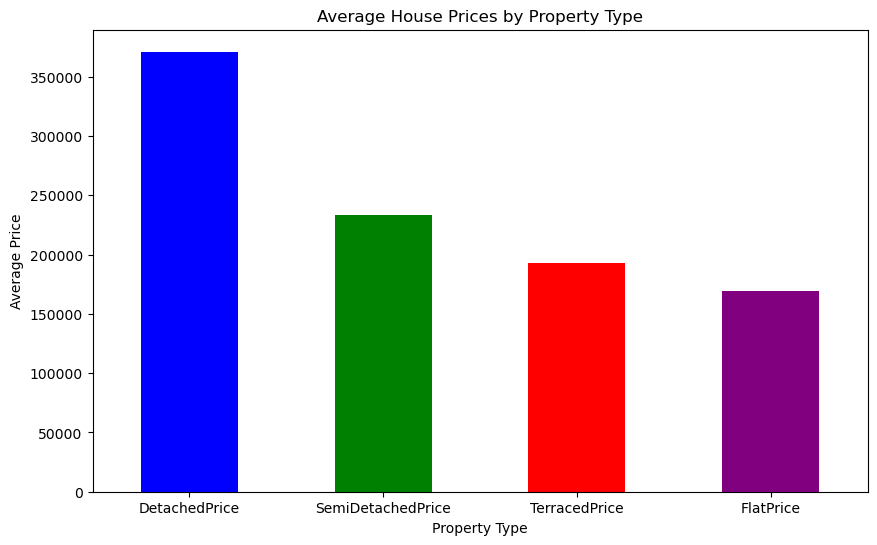

In [10]:
# Plot the average prices
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])

plt.title('Average House Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.savefig('../Output/average_prices.png')
plt.show()


In [11]:
# Extract columns related to property prices and indices
columns_of_interest = [
    'Date', 'DetachedPrice', 'DetachedIndex', 'SemiDetachedPrice', 'SemiDetachedIndex', 
    'TerracedPrice', 'TerracedIndex', 'FlatPrice', 'FlatIndex'
]
property_data = data[columns_of_interest]

# Display the first few rows of the extracted data
property_data.head()


Date  DetachedPrice  DetachedIndex  SemiDetachedPrice  \
0  01/01/2013    200466.4154      89.423104        125871.9192   
1  01/02/2013    200483.5222      89.430735        125569.5210   
2  01/03/2013    202609.4709      90.379068        126060.2481   
3  01/04/2013    203308.7097      90.690981        127146.9005   
4  01/05/2013    205321.7128      91.588932        128733.6797   

   SemiDetachedIndex  TerracedPrice  TerracedIndex    FlatPrice  FlatIndex  
0          89.523235    104184.0939      89.536952  84401.12070  89.651911  
1          89.308161    104680.6179      89.963670  84376.23819  89.625480  
2          89.657179    105164.3792      90.379420  85437.96257  90.753257  
3          90.430033    105690.3135      90.831414  85583.04109  90.907361  
4          91.558590    107169.5347      92.102673  87084.01868  92.501718

In [12]:
# Convert the Date column to datetime and set as index
property_data['Date'] = pd.to_datetime(property_data['Date'])
property_data.set_index('Date', inplace=True)

# Display the first few rows to confirm changes
property_data.head()


C:\Users\nj_al\AppData\Local\Temp\ipykernel_20404\2573727449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_data['Date'] = pd.to_datetime(property_data['Date'])


DetachedPrice  DetachedIndex  SemiDetachedPrice  \
Date                                                          
2013-01-01    200466.4154      89.423104        125871.9192   
2013-01-02    200483.5222      89.430735        125569.5210   
2013-01-03    202609.4709      90.379068        126060.2481   
2013-01-04    203308.7097      90.690981        127146.9005   
2013-01-05    205321.7128      91.588932        128733.6797   

            SemiDetachedIndex  TerracedPrice  TerracedIndex    FlatPrice  \
Date                                                                       
2013-01-01          89.523235    104184.0939      89.536952  84401.12070   
2013-01-02          89.308161    104680.6179      89.963670  84376.23819   
2013-01-03          89.657179    105164.3792      90.379420  85437.96257   
2013-01-04          90.430033    105690.3135      90.831414  85583.04109   
2013-01-05          91.558590    107169.5347      92.102673  87084.01868   

            FlatIndex  
Date                   
2013-01-01  89.651911  
2013-01-02  89.625480  
2013-01-03  90.753257  
2013-01-04  90.907361  
2013-01-05  92.501718

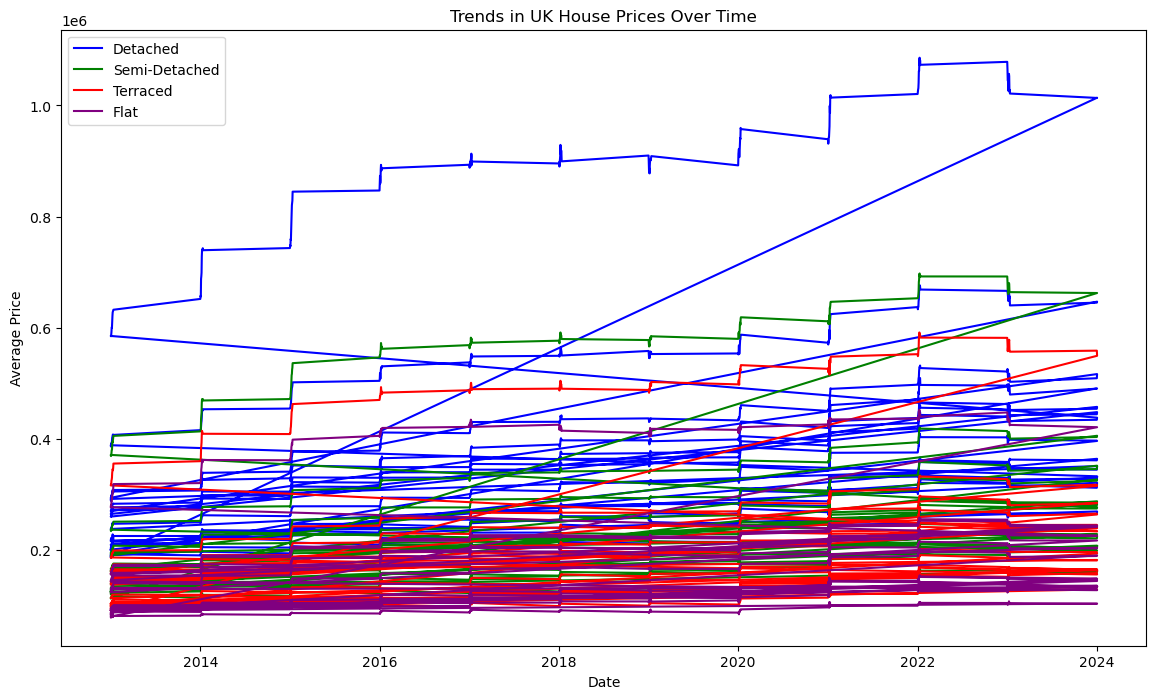

In [13]:
# Plot trends in house prices over time
plt.figure(figsize=(14, 8))

# Plot each property type
plt.plot(property_data.index, property_data['DetachedPrice'], label='Detached', color='blue')
plt.plot(property_data.index, property_data['SemiDetachedPrice'], label='Semi-Detached', color='green')
plt.plot(property_data.index, property_data['TerracedPrice'], label='Terraced', color='red')
plt.plot(property_data.index, property_data['FlatPrice'], label='Flat', color='purple')

# Add titles and labels
plt.title('Trends in UK House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.savefig('../Output/house_prices_over_time.png')
# Display the plot
plt.show()


In [14]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract the relevant columns
relevant_data = data[['Date', 'AveragePrice']]

# Display the first few rows of the extracted data
relevant_data.head()


Date  AveragePrice
0 2013-01-01   137536.5355
1 2013-01-02   137599.2999
2 2013-01-03   138561.8313
3 2013-01-04   139314.2861
4 2013-01-05   141012.3511

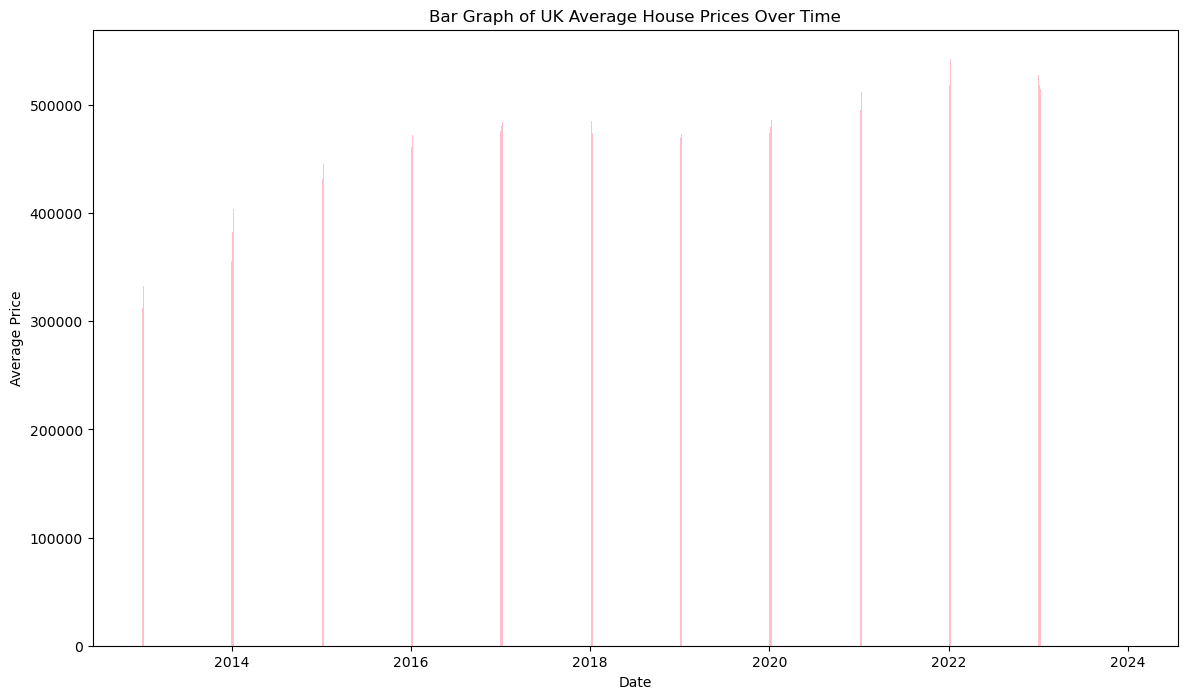

In [15]:
# Create a bar graph
plt.figure(figsize=(14, 8))
plt.bar(relevant_data['Date'], relevant_data['AveragePrice'], color='pink')

# Add titles and labels
plt.title('Bar Graph of UK Average House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.savefig('../Output/Bar_Graph_of_UK_Average_House_Prices.png')
# Display the plot
plt.show()


        Date  AveragePrice  SalesVolume  DetachedPrice  DetachedIndex  \
0 2013-01-01   137536.5355       3447.0    200466.4154      89.423104   
1 2013-01-02   137599.2999       3522.0    200483.5222      89.430735   
2 2013-01-03   138561.8313       4585.0    202609.4709      90.379068   
3 2013-01-04   139314.2861       4258.0    203308.7097      90.690981   
4 2013-01-05   141012.3511       5780.0    205321.7128      91.588932   

   Detached1m%Change  Detached12m%Change  SemiDetachedPrice  \
0          -1.193768            0.590013        125871.9192   
1           0.008533            0.961844        125569.5210   
2           1.060411            2.276697        126060.2481   
3           0.345117            0.189750        127146.9005   
4           0.990121            1.746837        128733.6797   

   SemiDetachedIndex  SemiDetached1m%Change  ...     NewPrice   NewIndex  \
0          89.523235              -0.480266  ...  173897.6555  86.715297   
1          89.308161          

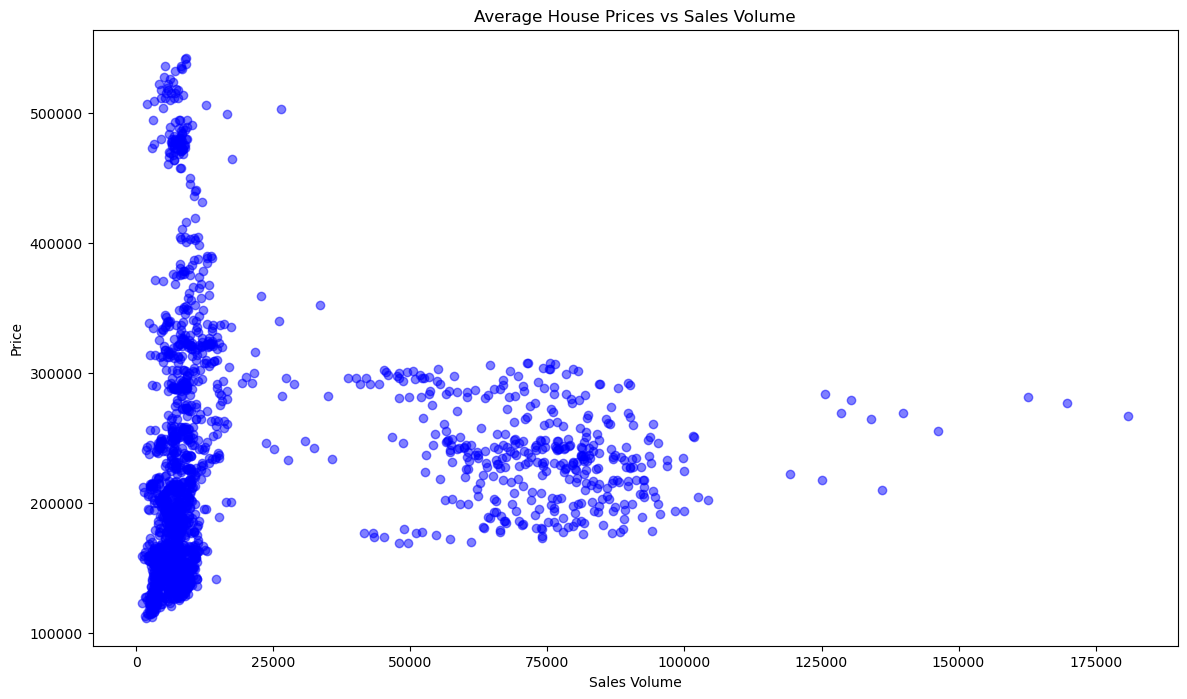

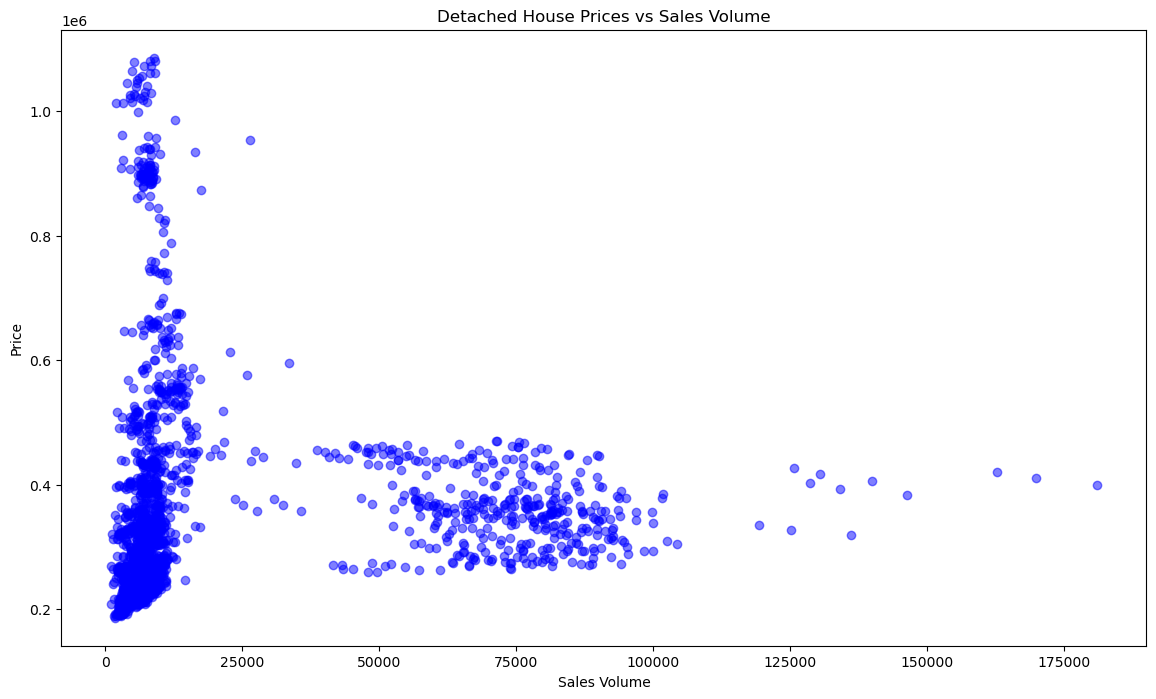

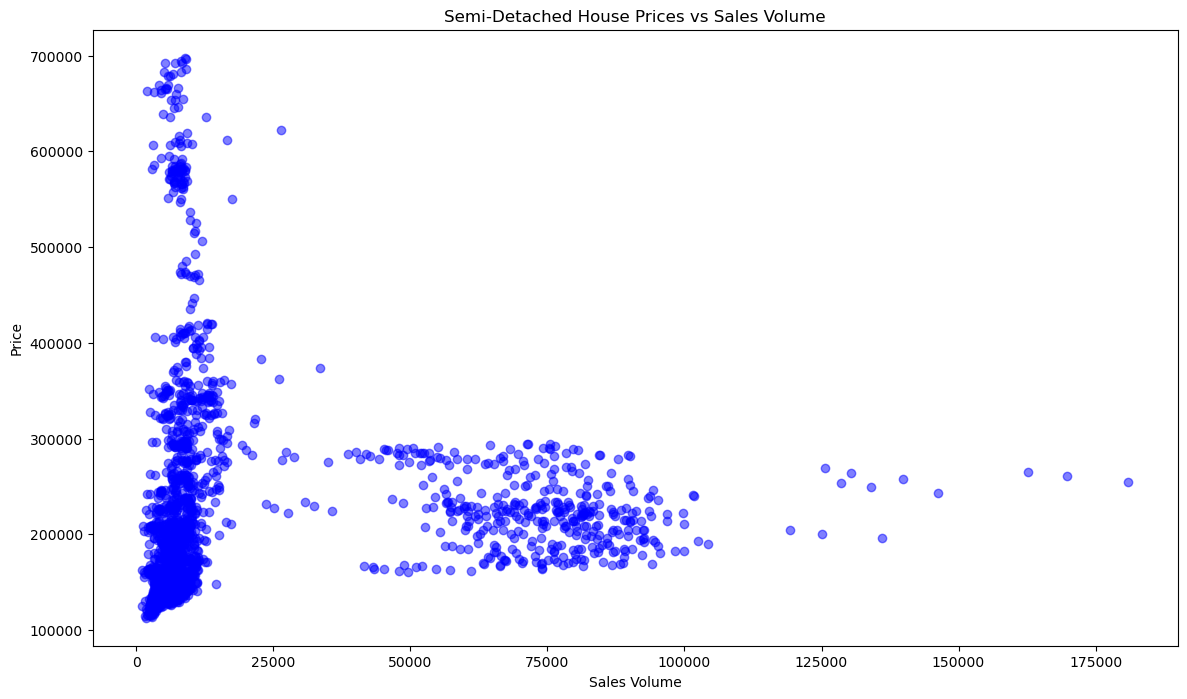

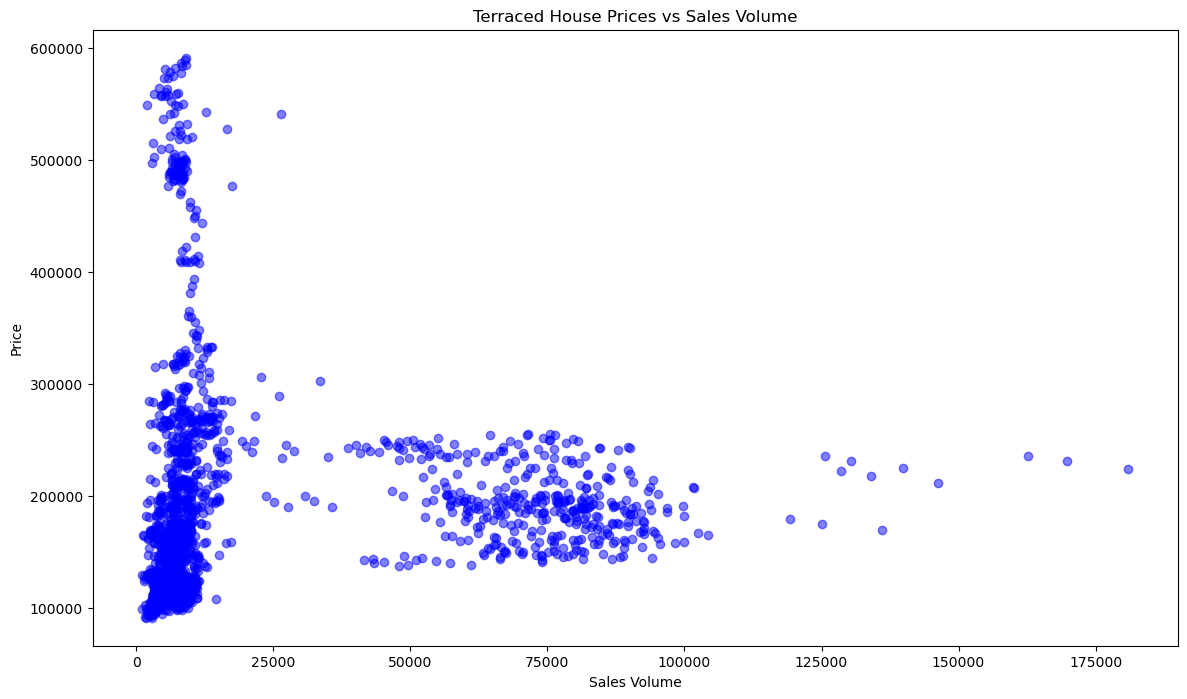

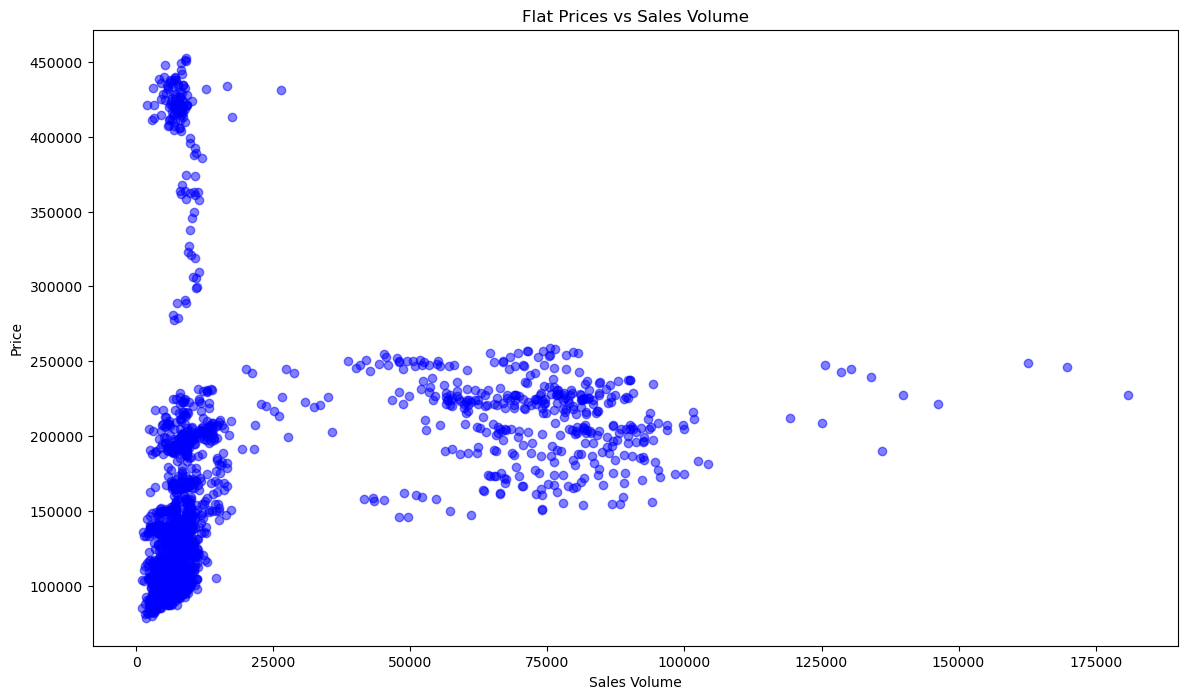

{'Average': 0.07918789273992406,
 'Detached': -0.007127229095081111,
 'Semi-Detached': -0.017510439722455168,
 'Terraced': 0.02763435349923436,
 'Flat': 0.27924108000027487}

In [19]:
# Extract the relevant columns for different property types
columns_of_interest = [
    'Date', 'AveragePrice', 'SalesVolume', 
    'DetachedPrice', 'DetachedIndex', 'Detached1m%Change', 'Detached12m%Change',
    'SemiDetachedPrice', 'SemiDetachedIndex', 'SemiDetached1m%Change', 'SemiDetached12m%Change',
    'TerracedPrice', 'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change',
    'FlatPrice', 'FlatIndex', 'Flat1m%Change', 'Flat12m%Change',
    'CashPrice', 'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume',
    'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change', 'Mortgage12m%Change', 'MortgageSalesVolume',
    'NewPrice', 'NewIndex', 'New1m%Change', 'New12m%Change', 'NewSalesVolume',
    'OldPrice', 'OldIndex', 'Old1m%Change', 'Old12m%Change', 'OldSalesVolume'
]

# Extract the relevant columns from the dataset
relevant_data = data[columns_of_interest]

# Display the first few rows of the extracted data
print(relevant_data.head())

# Ensure the output directory exists
output_dir = '../Output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create scatter plot for given price and sales volume columns
def plot_relationship(price_column, sales_column, title, filename):
    plt.figure(figsize=(14, 8))
    plt.scatter(relevant_data[sales_column], relevant_data[price_column], color='blue', alpha=0.5)
    plt.title(title)
    plt.xlabel('Sales Volume')
    plt.ylabel('Price')
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()

# Plot relationships for different property types
plot_relationship('AveragePrice', 'SalesVolume', 'Average House Prices vs Sales Volume', 'average_prices_vs_sales_volume.png')
plot_relationship('DetachedPrice', 'SalesVolume', 'Detached House Prices vs Sales Volume', 'detached_prices_vs_sales_volume.png')
plot_relationship('SemiDetachedPrice', 'SalesVolume', 'Semi-Detached House Prices vs Sales Volume', 'semi_detached_prices_vs_sales_volume.png')
plot_relationship('TerracedPrice', 'SalesVolume', 'Terraced House Prices vs Sales Volume', 'terraced_prices_vs_sales_volume.png')
plot_relationship('FlatPrice', 'SalesVolume', 'Flat Prices vs Sales Volume', 'flat_prices_vs_sales_volume.png')

# Calculate the correlation coefficients for different property types
correlations = {
    'Average': relevant_data['AveragePrice'].corr(relevant_data['SalesVolume']),
    'Detached': relevant_data['DetachedPrice'].corr(relevant_data['SalesVolume']),
    'Semi-Detached': relevant_data['SemiDetachedPrice'].corr(relevant_data['SalesVolume']),
    'Terraced': relevant_data['TerracedPrice'].corr(relevant_data['SalesVolume']),
    'Flat': relevant_data['FlatPrice'].corr(relevant_data['SalesVolume'])
}

# Display the correlation coefficients
correlations